<a href="https://colab.research.google.com/github/ahmadSoliman94/Machine-Learning/blob/main/tumor_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget   brain-tumor-mri-dataset.zip  https://www.dropbox.com/s/n2bj9xj1cpyrboi/brain-tumor-mri-dataset.zip

--2022-04-28 20:11:16--  http://brain-tumor-mri-dataset.zip/
Resolving brain-tumor-mri-dataset.zip (brain-tumor-mri-dataset.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘brain-tumor-mri-dataset.zip’
--2022-04-28 20:11:16--  https://www.dropbox.com/s/n2bj9xj1cpyrboi/brain-tumor-mri-dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/n2bj9xj1cpyrboi/brain-tumor-mri-dataset.zip [following]
--2022-04-28 20:11:16--  https://www.dropbox.com/s/raw/n2bj9xj1cpyrboi/brain-tumor-mri-dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc810a0c839fa4c888881da246ef.dl.dropboxusercontent.com/cd/0/inline/BkTPZ0rdyEDVGxmcqq2YPfek_0rpwIqgre6Hy-xPqlVGvHxhTZaGMe4zZ4-973EHQBMmLq2N4biie7rZeq

In [ ]:
import os
from zipfile import ZipFile
work_dir = os.getcwd()                                                
with ZipFile(os.path.join(work_dir ,'/content/brain-tumor-mri-dataset.zip'),'r') as zipobject:
  zipobject.extractall()

# **tensorflow & Keras**

In [ ]:
import  pandas  as  pd 
import matplotlib.pyplot as plt
import  cv2
from sklearn.utils import shuffle

# **Data set explore**

In [ ]:
tumor_types = ['glioma', 'pituitary', 'notumor', 'meningioma']
data_dir = "/content/Training/"
#To join all the data under one directory seperator ('/') which is in plant village directory
train_dir = os.path.join(data_dir) 
os.listdir(data_dir)
# test_dir = os.path.join(data_dir, 'test')

['glioma', 'pituitary', 'notumor', 'meningioma']

In [ ]:
train_data = []
for defects_id, sp in enumerate(tumor_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
        
train = pd.DataFrame(train_data, columns=['File', 'tumorID','tumor Type'])
train.head()

,File,tumorID,tumor Type
0,glioma/Tr-gl_0206.jpg,0,glioma
1,glioma/Tr-gl_1296.jpg,0,glioma
2,glioma/Tr-gl_1220.jpg,0,glioma
3,glioma/Tr-gl_1279.jpg,0,glioma
4,glioma/Tr-gl_0537.jpg,0,glioma


In [ ]:
train.tail(n=20)

,File,tumorID,tumor Type
5692,meningioma/Tr-me_0326.jpg,3,meningioma
5693,meningioma/Tr-me_0427.jpg,3,meningioma
5694,meningioma/Tr-me_0304.jpg,3,meningioma
5695,meningioma/Tr-me_0432.jpg,3,meningioma
5696,meningioma/Tr-me_0844.jpg,3,meningioma
5697,meningioma/Tr-me_1254.jpg,3,meningioma
5698,meningioma/Tr-me_0879.jpg,3,meningioma
5699,meningioma/Tr-me_0801.jpg,3,meningioma
5700,meningioma/Tr-me_0963.jpg,3,meningioma
5701,meningioma/Tr-me_1241.jpg,3,meningioma


In [ ]:
# Randomize the order of training set. Basically everything is getting mixed with given SEED value.
SEED = 50
train = train.sample(frac=1, random_state=SEED) 
train.index = np.arange(len(train)) # Reset indices
train.head(n=20)

,File,tumorID,tumor Type
0,meningioma/Tr-me_0058.jpg,3,meningioma
1,meningioma/Tr-me_0471.jpg,3,meningioma
2,meningioma/Tr-me_0644.jpg,3,meningioma
3,notumor/Tr-no_0806.jpg,2,notumor
4,glioma/Tr-gl_0657.jpg,0,glioma
5,notumor/Tr-no_1060.jpg,2,notumor
6,glioma/Tr-gl_0468.jpg,0,glioma
7,notumor/Tr-no_0520.jpg,2,notumor
8,notumor/Tr-no_1178.jpg,2,notumor
9,notumor/Tr-no_1208.jpg,2,notumor


In [ ]:
for i in range(4):
    print (i, tumor_types[i])

0 glioma
1 pituitary
2 notumor
3 meningioma


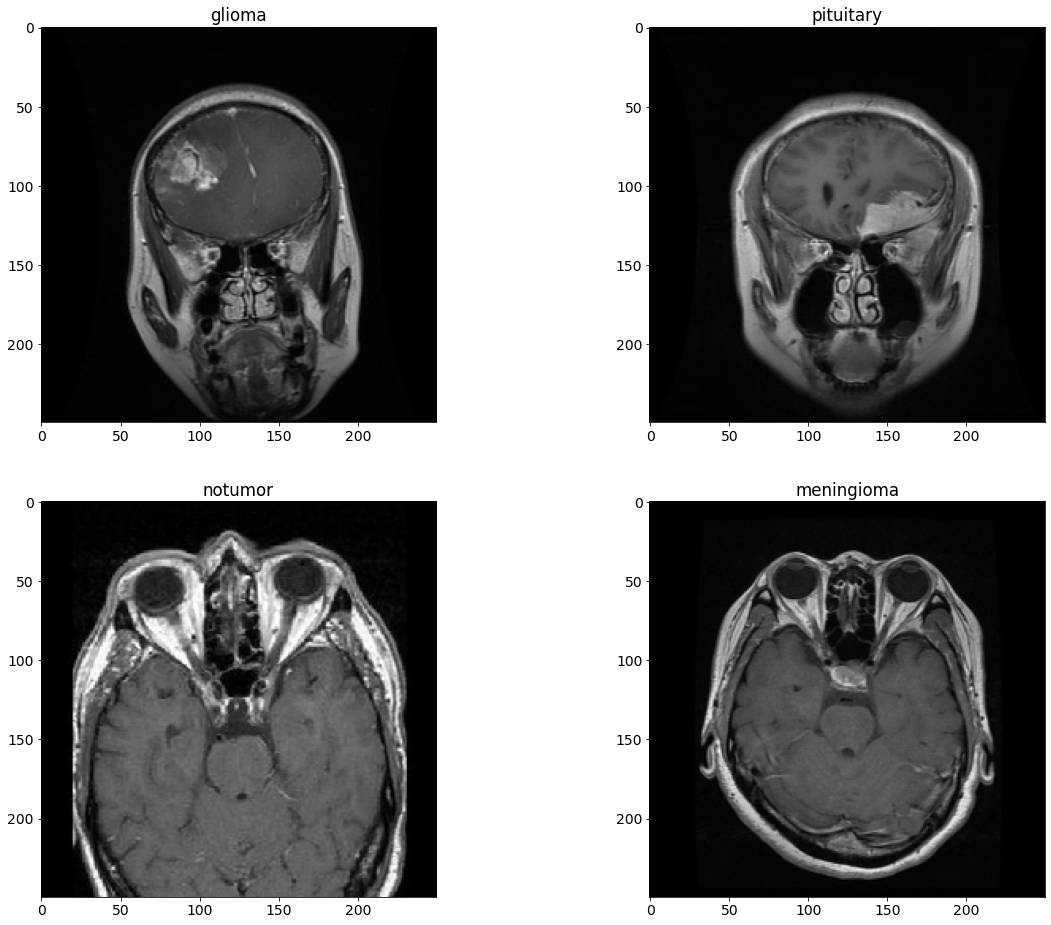

In [ ]:
plt.figure(figsize=(20, 16))

images_path = ['/glioma/Tr-glTr_0000.jpg', '/meningioma/Tr-meTr_0000.jpg', '/notumor/Tr-noTr_0000.jpg', '/pituitary/Tr-piTr_0000.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(data_dir + images_path[i])
    img = cv2.resize(img, (250, 250))
    plt.imshow(img)
    plt.title(tumor_types[i])

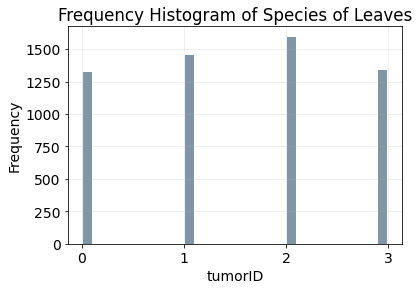

<Figure size 864x864 with 0 Axes>

In [ ]:
# Plot a histogram
plt.hist(train['tumorID'], bins='auto', color='#607c8e',alpha=0.8, rwidth=0.85)
# plt.hist(train['DiseaseID'])
plt.xticks(np.arange(0, 4, step=1))
plt.grid(alpha=0.25)
plt.xlabel('tumorID')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Species of Leaves')
plt.figure(figsize=(12, 12))
plt.show()

In [ ]:
train_dir = '/content/Training/'
test_dir = '/content/Testing/'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+label):
        train_paths.append(train_dir+label+'/'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

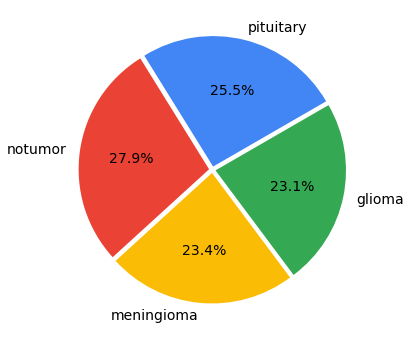

In [ ]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in train_labels if x=='pituitary']),
         len([x for x in train_labels if x=='notumor']),
         len([x for x in train_labels if x=='meningioma']),
         len([x for x in train_labels if x=='glioma'])],
        labels=['pituitary','notumor', 'meningioma', 'glioma'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30);

# **Data preparation & DATA AUGMENTATION**

In [ ]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_dir =  "/content/Training"
validation_data_dir ="/content/Testing"

In [ ]:


generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False) 

generator_test = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

# Creating the train and test data.

train = generator_train.flow_from_directory(train_data_dir, target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory(validation_data_dir, target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# **Modeling**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:

model1 = Sequential()

# Convolutional layer 1
model1.add(Conv2D(32,(3,3), input_shape=(64, 64, 1), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 2
model1.add(Conv2D(32,(3,3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

# Neural network

model1.add(Dense(units= 252, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=252, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=4, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 32)       128       
 hNormalization)                                                 
                                                        

In [ ]:
history1 = model1.fit(train, steps_per_epoch=5712//32, epochs=75, validation_data=test, validation_steps= 1311//32)

Epoch 1/75
178/178 [==============================] - 48s 264ms/step - loss: 0.8022 - categorical_accuracy: 0.7218 - val_loss: 7.4323 - val_categorical_accuracy: 0.3102
Epoch 2/75
178/178 [==============================] - 46s 259ms/step - loss: 0.4419 - categorical_accuracy: 0.8345 - val_loss: 8.8235 - val_categorical_accuracy: 0.3539
Epoch 3/75
178/178 [==============================] - 45s 253ms/step - loss: 0.3408 - categorical_accuracy: 0.8752 - val_loss: 1.2781 - val_categorical_accuracy: 0.6820
Epoch 4/75
178/178 [==============================] - 45s 251ms/step - loss: 0.2499 - categorical_accuracy: 0.9076 - val_loss: 0.2573 - val_categorical_accuracy: 0.8969
Epoch 5/75
178/178 [==============================] - 45s 250ms/step - loss: 0.1815 - categorical_accuracy: 0.9336 - val_loss: 0.1959 - val_categorical_accuracy: 0.9219
Epoch 6/75
178/178 [==============================] - 45s 253ms/step - loss: 0.1546 - categorical_accuracy: 0.9465 - val_loss: 0.2230 - val_categorical_acc

In [ ]:
results = model1.evaluate(test)
print('val loss:', results[0])
print('val acc:', results[1])

41/41 [==============================] - 5s 124ms/step - loss: 0.0966 - categorical_accuracy: 0.9863
val loss: 0.09655152261257172
val acc: 0.986270010471344


In [ ]:
import seaborn as sns

# Set parameters for plotting
plt.rc('figure', figsize=(8, 4))
sns.set(font_scale=1)

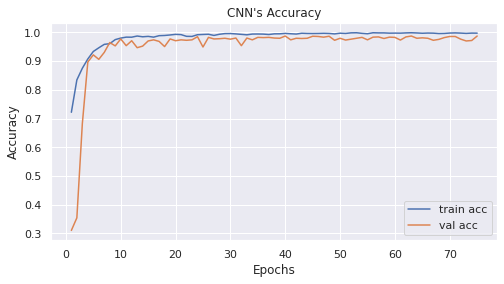

In [ ]:
train_acc = history1.history['categorical_accuracy']
val_acc = history1.history['val_categorical_accuracy']

epochs_list = list(range(1, 76))

plt.plot(epochs_list, train_acc, label='train acc')
plt.plot(epochs_list, val_acc, label='val acc')
plt.title("CNN's Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

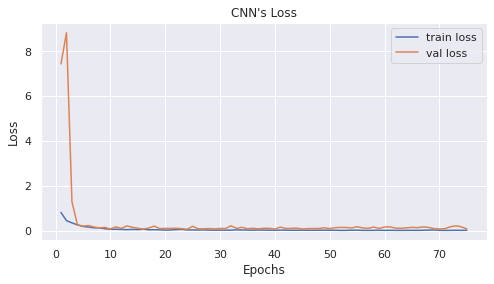

In [ ]:
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.plot(epochs_list, train_loss, label='train loss')
plt.plot(epochs_list, val_loss, label='val loss')
plt.title("CNN's Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

In [ ]:
pred = model1.predict(test)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test.classes]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
acc = accuracy_score(y_test, pred)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      glioma       0.20      0.20      0.20       300
  meningioma       0.24      0.24      0.24       306
     notumor       0.30      0.30      0.30       405
   pituitary       0.19      0.19      0.19       300

    accuracy                           0.24      1311
   macro avg       0.23      0.23      0.23      1311
weighted avg       0.24      0.24      0.24      1311



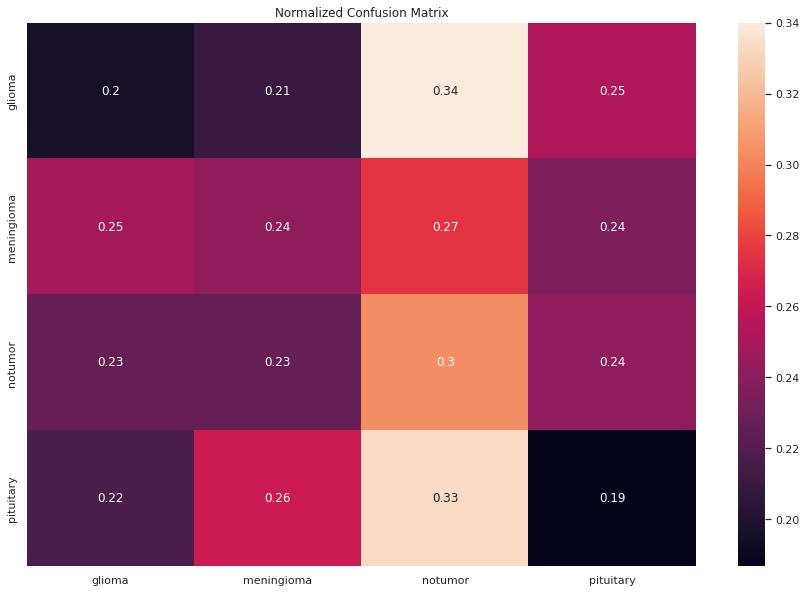

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),
            )
plt.title('Normalized Confusion Matrix')
plt.show()

# **Torche**

In [ ]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader

In [ ]:
data_dir = '/content/Training'
test_dir = '/content/Testing'
classes = os.listdir(data_dir)
print(classes)
print(len(classes))

['glioma', 'pituitary', 'notumor', 'meningioma']
4


In [ ]:
train_transform=transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(80),             # resize shortest side
        transforms.CenterCrop(80),         # crop longest side
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

In [ ]:
dataset = ImageFolder(data_dir, transform=train_transform)
testset = ImageFolder(test_dir, transform=train_transform)

In [ ]:
# view one image shape of the dataset.
img, label = dataset[100]
print(img.shape)

torch.Size([3, 80, 80])


In [ ]:
# function for the showing the image.
def show_image(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  glioma (0)


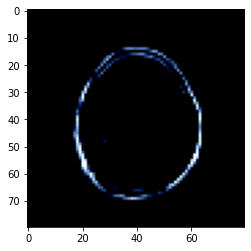

In [ ]:
show_image(*dataset[80])

In [ ]:
torch.manual_seed(10)
val_size = len(dataset)//10
test_size = len(testset)
train_size = len(dataset) - val_size

In [ ]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])
test_ds = testset
len(train_ds), len(val_ds), len(test_ds)   

(5141, 571, 1311)

In [ ]:
batch_size = 64
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


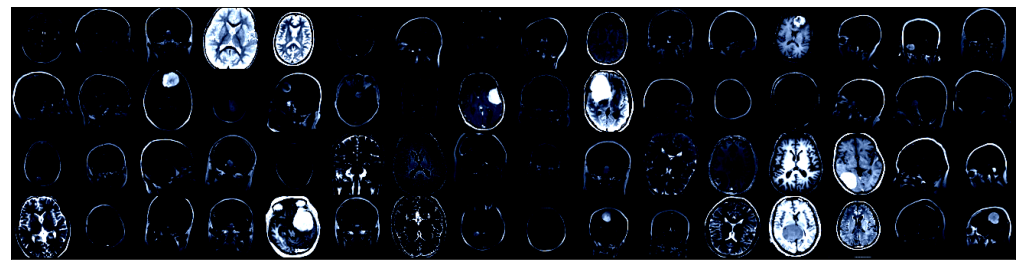

In [ ]:
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
torch.cuda.is_available()


False

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cpu')

In [ ]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [ ]:
input_size = 3*80*80
output_size = len(classes)

**Modeling**

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                   # Generate predictions
        loss = F.cross_entropy(out, labels)  # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
class CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 100, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(100, 150, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(150, 200, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(200, 200, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(200, 250, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(250, 250, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Flatten(), 
            nn.Linear(25000, 64),  
            nn.ReLU(),            
            nn.Linear(64, 32),  
            nn.ReLU(),            
            nn.Linear(32, 16),           
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(8, output_size))
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = CnnModel()

In [ ]:
model


CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 150, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(150, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(200, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(200, 250, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(250, 250, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=25000, out_features=64, bias=True)
    (17): ReLU()
    (18): Linear(in_features

In [ ]:
for images, labels in train_loader:
    out = model(images)
    print('images.shape:', images.shape)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([64, 3, 80, 80])
out.shape: torch.Size([64, 4])
out[0]: tensor([-0.3742, -0.2018,  0.1807,  0.0632], grad_fn=<SelectBackward0>)


In [ ]:
device = get_default_device()
device

device(type='cpu')

In [ ]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
to_device(model, device)

CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 150, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(150, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(200, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(200, 250, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(250, 250, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=25000, out_features=64, bias=True)
    (17): ReLU()
    (18): Linear(in_features

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(CnnModel(), device)


In [ ]:
history=[evaluate(model, val_loader)]
history

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.24486228823661804, 'val_loss': 1.4294883012771606}]

In [ ]:
num_epochs = 45
opt_func = torch.optim.Adam
lr = 0.0001

In [ ]:
history+= fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

  0%|          | 0/81 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 1.2320, val_loss: 0.9667, val_acc: 0.6106


  0%|          | 0/81 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.9738, val_loss: 0.9397, val_acc: 0.6835


  0%|          | 0/81 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.9280, val_loss: 0.8205, val_acc: 0.7106


  0%|          | 0/81 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.8596, val_loss: 0.8057, val_acc: 0.7280


  0%|          | 0/81 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.8443, val_loss: 0.7725, val_acc: 0.7450


  0%|          | 0/81 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.8024, val_loss: 0.8283, val_acc: 0.7317


  0%|          | 0/81 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.7648, val_loss: 0.7052, val_acc: 0.7484


  0%|          | 0/81 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.7285, val_loss: 0.6348, val_acc: 0.7708


  0%|          | 0/81 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.6967, val_loss: 0.6790, val_acc: 0.7528


  0%|          | 0/81 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.7066, val_loss: 0.7128, val_acc: 0.7721


  0%|          | 0/81 [00:00<?, ?it/s]

Epoch [10], train_loss: 0.6674, val_loss: 0.5776, val_acc: 0.7854


  0%|          | 0/81 [00:00<?, ?it/s]

Epoch [11], train_loss: 0.6186, val_loss: 0.5628, val_acc: 0.7655


  0%|          | 0/81 [00:00<?, ?it/s]

Epoch [12], train_loss: 0.5976, val_loss: 0.5417, val_acc: 0.8036


  0%|          | 0/81 [00:00<?, ?it/s]

Epoch [13], train_loss: 0.5613, val_loss: 0.5314, val_acc: 0.8132


  0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')
    plt.show()
    
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')
    plt.show()

In [ ]:
plot_accuracies(history)


In [ ]:
plot_losses(history)


In [ ]:
evaluate(model, test_loader)